<a href="https://colab.research.google.com/github/Princeton-CDH/simulating-risk/blob/main/notebooks/riskyfood_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risky food simulation

## setup

install dependencies

In [ ]:
# install forked version of mesa for now, to get local enhancements for jupyterviz
%%capture
%pip uninstall --no-input mesa
%pip install git+https://github.com/Princeton-CDH/mesa.git@expand-jupyterviz#egg=mesa
#%pip install git+https://github.com/Princeton-CDH/mesa.git@583f20beb7efb15b15758573555ce7e74f3c8333#egg=mesa

# install simulating risk code from github
%pip install git+https://github.com/Princeton-CDH/simulating-risk.git@main#egg=simulatingrisk

## run the simulation


In [ ]:
from simulatingrisk.risky_food.app import page


page

Html(layout=None, style_='display: none', tag='span')

Cannot show ipywidgets in text

## data analysis

Run preliminary data analysis on data collected by the model.

**NOTE**: Re-run this step after re-running the simulation to get the latest data

In [ ]:
# get model data from the data collector
# page.args[0] == viz object;
model_df = page.args[0].model.datacollector.get_model_vars_dataframe()
# convert boolean contaminated flag to 0/1 so we can more easily plot
model_df["contaminated_i"] = model_df["contaminated"].astype(int)
model_df.head(10)

,prob_notcontaminated,contaminated,average_risk_level,min_risk_level,max_risk_level,num_agents,contaminated_i
0,0.564714,0,0.500000,0.0,1.0,110,0
1,0.319115,0,0.411765,0.0,1.0,170,0
2,0.091997,1,0.328000,0.0,1.0,250,1
3,0.172058,1,0.356522,0.0,1.0,230,1
4,0.195650,0,0.400000,0.0,1.0,200,0
5,0.519607,1,0.356522,0.0,1.0,230,1
6,0.359001,1,0.435714,0.0,1.0,140,1
7,0.636125,0,0.523810,0.0,1.0,105,0
8,0.407315,1,0.447059,0.0,1.0,170,1
9,0.709399,0,0.528000,0.0,1.0,125,0


### state of the world for this run

- what was the probability that the food would _NOT_ be contaminated?  (blue trendline)
- when was the food actually contaminated? (red bar indicates contamination)

In [ ]:
import altair as alt

base = alt.Chart(model_df.reset_index()).mark_line().encode(
    x='index', # alt.X('index').title("round"),
    y='prob_notcontaminated',
).properties(
    width=800,
    height=200
)

actual_n = base.mark_bar(color="red", opacity=0.7, width=3).encode(
    # x=alt.X('index').title("round"),
    y='contaminated_i')
# combine the two charts vertically
alt.vconcat(base, actual_n.properties(width=800,height=50))

alt.VConcatChart(...)

### agent risk attitudes

In [ ]:
# get agent data from model collected data
agent_df = page.args[0].model.datacollector.get_agent_vars_dataframe()
agent_df = agent_df.reset_index() # reset index so we can access by step
agent_df

,Step,AgentID,risk_level,payoff
0,1,0-0,0.0,4
1,1,0-1,0.0,4
2,1,0-2,0.0,4
3,1,0-3,0.0,4
4,1,0-4,0.0,4
...,...,...,...,...
12140792,62,2232769,0.1,1
12140793,62,2232770,0.1,1
12140794,62,2232771,0.1,1
12140795,62,2232772,0.1,1


#### last round

what is the state of things at the last round run?

In [ ]:
# get data for the last round
last_step_n = max(agent_df.Step)
last_step = agent_df[agent_df.Step == last_step_n]
last_step.head(10)

,Step,AgentID,risk_level,payoff
9989907,62,1-0,0.1,1
9989908,62,1-1,0.1,1
9989909,62,1-2,0.1,1
9989910,62,1-3,0.1,1
9989911,62,1-4,0.1,1
9989912,62,2-0,0.2,1
9989913,62,2-1,0.2,1
9989914,62,2-2,0.2,1
9989915,62,2-3,0.2,1
9989916,62,2-4,0.2,1


What's the risk attitude distribution on the last round?

In [ ]:
# describe risk level parameter
last_step.risk_level.describe()


count    2.150890e+06
mean     5.544691e-01
std      6.644578e-02
min      1.000000e-01
25%      5.000000e-01
50%      6.000000e-01
75%      6.000000e-01
max      1.000000e+00
Name: risk_level, dtype: float64

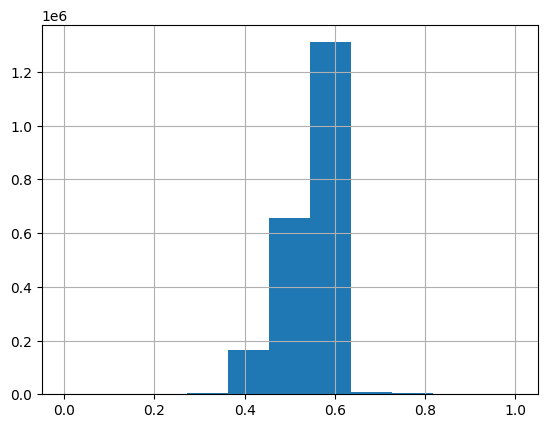

In [ ]:
# plot a histogram of risk levels on the last round
import matplotlib.pylab as plt
%matplotlib inline

last_step.risk_level.hist(range=[0,1], bins=11)
plt.show()

#### multiple rounds

plot agent risk levels across rounds periodically

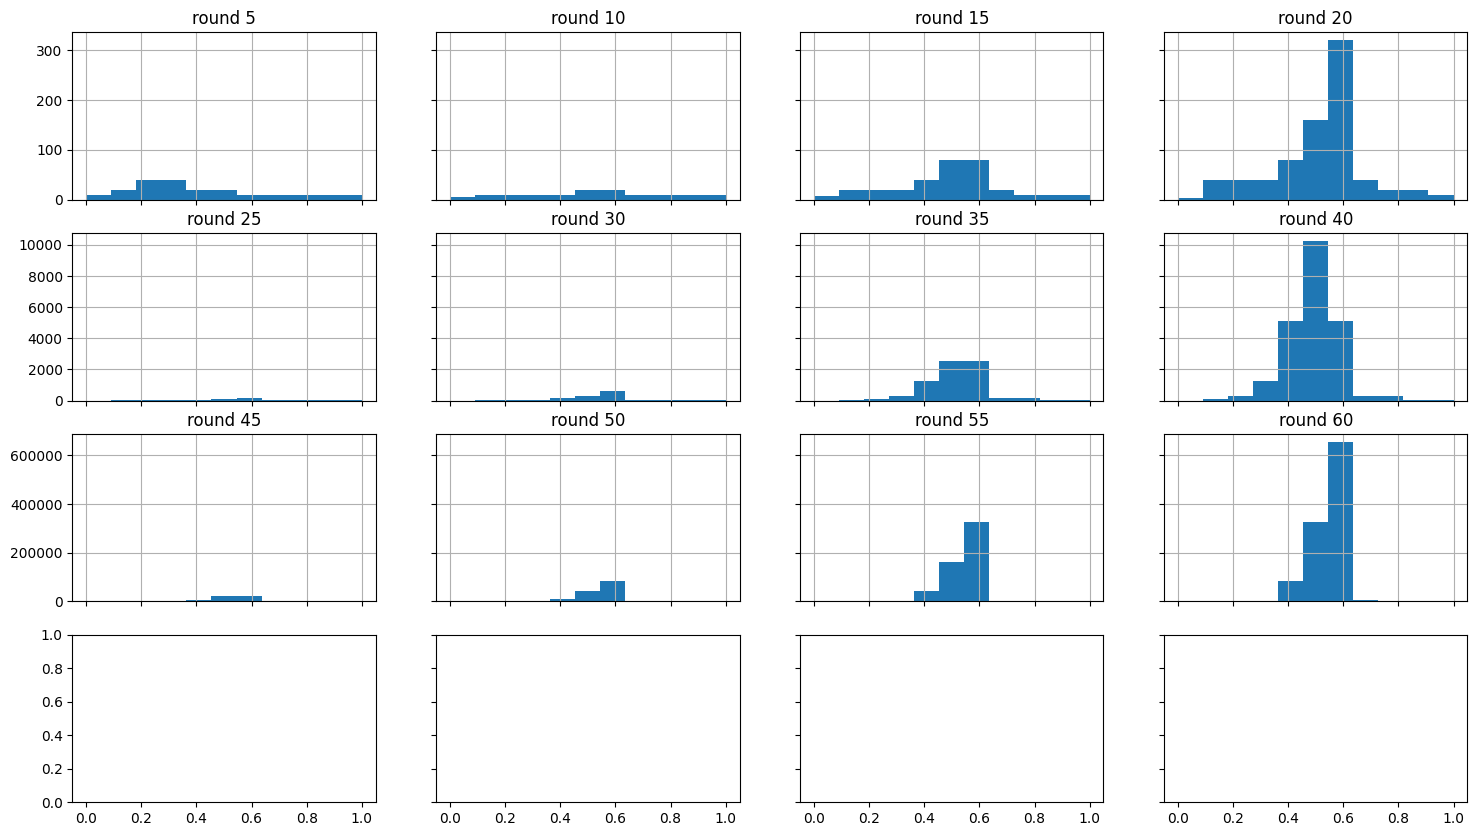

In [ ]:
import matplotlib.pyplot as plt
# create a grid to plot multiple rounds
fig, ax = plt.subplots(ncols=4, nrows=4, sharex='col', sharey='row', figsize=(18,10))

# try plotting every 5 rounds
# (harder to run this one as long due to population expansion)
max_plots = 4 * 4

# iterate by fives starting with 5
for i, round in enumerate(range(5, last_step_n, 5)):
    if i >= max_plots:  # don't go beyond what our subplot grid can handle
      break
    round_data = agent_df[agent_df.Step == round]
    plot_location = ax[int(i/4), int(i % 4)]
    round_data.risk_level.hist(ax=plot_location, range=[0,1], bins=11)
    plot_location.set_title("round %d" % (round,))
